In [1]:
!pip install xnat

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 11.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.3 MB/s eta 0:00:0031m14.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 8.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.7 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 2.9 MB/s eta 0:00:002.4 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import xnat
import pydicom
from pydicom.data import get_testdata_files
import matplotlib.pyplot as plt
import numpy

In [2]:
# Connecting to an XNAT instance
session = xnat.connect('http://localhost', user = 'admin')

Please enter the password for user 'admin': ········


In [3]:
session.projects["20231206"]

<ProjectData Sample RSNA-MICCAI Brain Tumor Radiogenomic Classification (20231206)>

In [4]:
kaggle_project = session.projects["20231206"]
print("Number of subjects in Dataset: ", len(kaggle_project.subjects))

Number of subjects in Dataset:  26


In [5]:
for subject in session.projects["20231206"].subjects.values():
    print(subject.label)

00337
00001
00335
00333
00037
00135
00015
00119
00079
00153
00013
00323
00372
00287
00080
00047
00422
00129
00125
00027
00384
00145
00082
00381
00091
00163


In [6]:
file_object_T2w = session.projects["20231206"].subjects['00337'].experiments['00337'].scans['T2w'].resources['DICOM'].files[0]

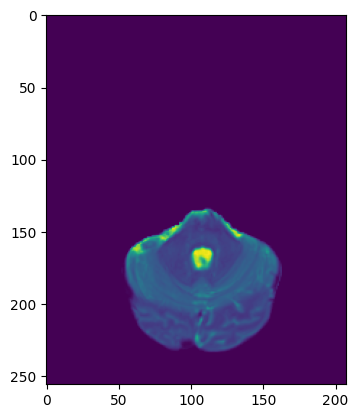

In [7]:
ds = pydicom.dcmread(file_object_T2w.open())
plt.imshow(ds.pixel_array)

In [19]:
# DICOM Header Metadata
dicom_metadata = ds
dicom_metadata

Dataset.file_meta -------------------------------
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.50799227502500666096742929695773896649
(0008, 0050) Accession Number                    SH: '00337'
(0008, 0060) Modality                            CS: 'MR'
(0008, 103e) Series Description                  LO: 'T2w'
(0010, 0010) Patient's Name                      PN: '00337'
(0010, 0020) Patient ID                          LO: '00337'
(0018, 0023) MR Acquisition Type                 CS: '2D'
(0018, 0050) Slice Thickness                     DS: '3.0'
(0018, 0081) Echo Time                           DS: None
(0018, 0083) N

---
- To store the header data of a DICOM file in a pandas dataframe

In [23]:
type(ds)
# https://stackoverflow.com/questions/56601525/how-to-store-the-header-data-of-a-dicom-file-in-a-pandas-dataframe

pydicom.dataset.FileDataset

In [25]:
!pip install pandas
import pandas as pd
import re

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 KB 10.5 MB/s eta 0:00:00 MB/s eta 0:00:01


In [147]:
# ds.values()는 데이터셋의 값들을 가져와 DataFrame으로 변환합니다.
df = pd.DataFrame(ds.values())

# tag 열이 pydicom.tag 형식인지 확인 후 변환 및 'tag' 열 추가
df[0] = df[0].apply(lambda x: pydicom.dataelem.DataElement_from_raw(x) if isinstance(x, pydicom.dataelem.RawDataElement) else x)
df['tag'] = df[0].apply(lambda x: pydicom.tag.Tag(x) if isinstance(x, pydicom.tag.BaseTag) else x)
df['tag'] = df['tag'].astype('str')
pattern = r'\(\w{4},\s*\w{4}\)'  
df['tag'] = df['tag'].apply(lambda x: re.search(pattern, x).group() if re.search(pattern, x) else None)

# 'name' 및 'value' 열 생성
df['name'] = df[0].apply(lambda x: x.name)
df['value'] = df[0].apply(lambda x: x.value)

# 필요한 열만 선택하여 DataFrame 재구성
df = df[['tag', 'name', 'value']]

# 상위 3개 행 출력
df.head(3)

,tag,name,value
0,"(0008, 0005)",Specific Character Set,ISO_IR 100
1,"(0008, 0008)",Image Type,"[DERIVED, SECONDARY]"
2,"(0008, 0016)",SOP Class UID,1.2.840.10008.5.1.4.1.1.4


In [148]:
df

,tag,name,value
0,"(0008, 0005)",Specific Character Set,ISO_IR 100
1,"(0008, 0008)",Image Type,"[DERIVED, SECONDARY]"
2,"(0008, 0016)",SOP Class UID,1.2.840.10008.5.1.4.1.1.4
3,"(0008, 0018)",SOP Instance UID,1.2.826.0.1.3680043.8.498.50799227502500666096...
4,"(0008, 0050)",Accession Number,00337
5,"(0008, 0060)",Modality,MR
6,"(0008, 103e)",Series Description,T2w
7,"(0010, 0010)",Patient's Name,"(0, 0, 3, 3, 7)"
8,"(0010, 0020)",Patient ID,00337
9,"(0018, 0023)",MR Acquisition Type,2D
